### Isak Andersson AI23 - Maskininlärning
# Laboration

#### Uppgift 1 - Klassificering av hjärt- och kärlsjukdom
---

I denna NoteBook presenteras ett dataset gällande hjärt och kärlsjukdomar, blablabla FYLL PÅ.

Som introducering visas först en samling grafer och tabeller för att översiktligt beskriva datan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cardio_train.csv', sep=';').drop('id', axis=1)

sns.set_style('darkgrid')
# plt.style.use('dark_background')

In [2]:
df['age'] = (df['age'] / 365.25)#.apply(np.floor)

C:\Users\isaka\AppData\Local\Temp\ipykernel_19264\3022973794.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0, 0].set_xticklabels(['Healthy', 'Afflicted'])
C:\Users\isaka\AppData\Local\Temp\ipykernel_19264\3022973794.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0, 1].set_xticklabels(['Normal', 'Well above n.', 'Above normal'])
C:\Users\isaka\AppData\Local\Temp\ipykernel_19264\3022973794.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[1, 2].set_xticklabels(['Healthy', 'Afflicted'])


Text(0.5, 1.03, 'EDA over Cardivascular Disease dataset')

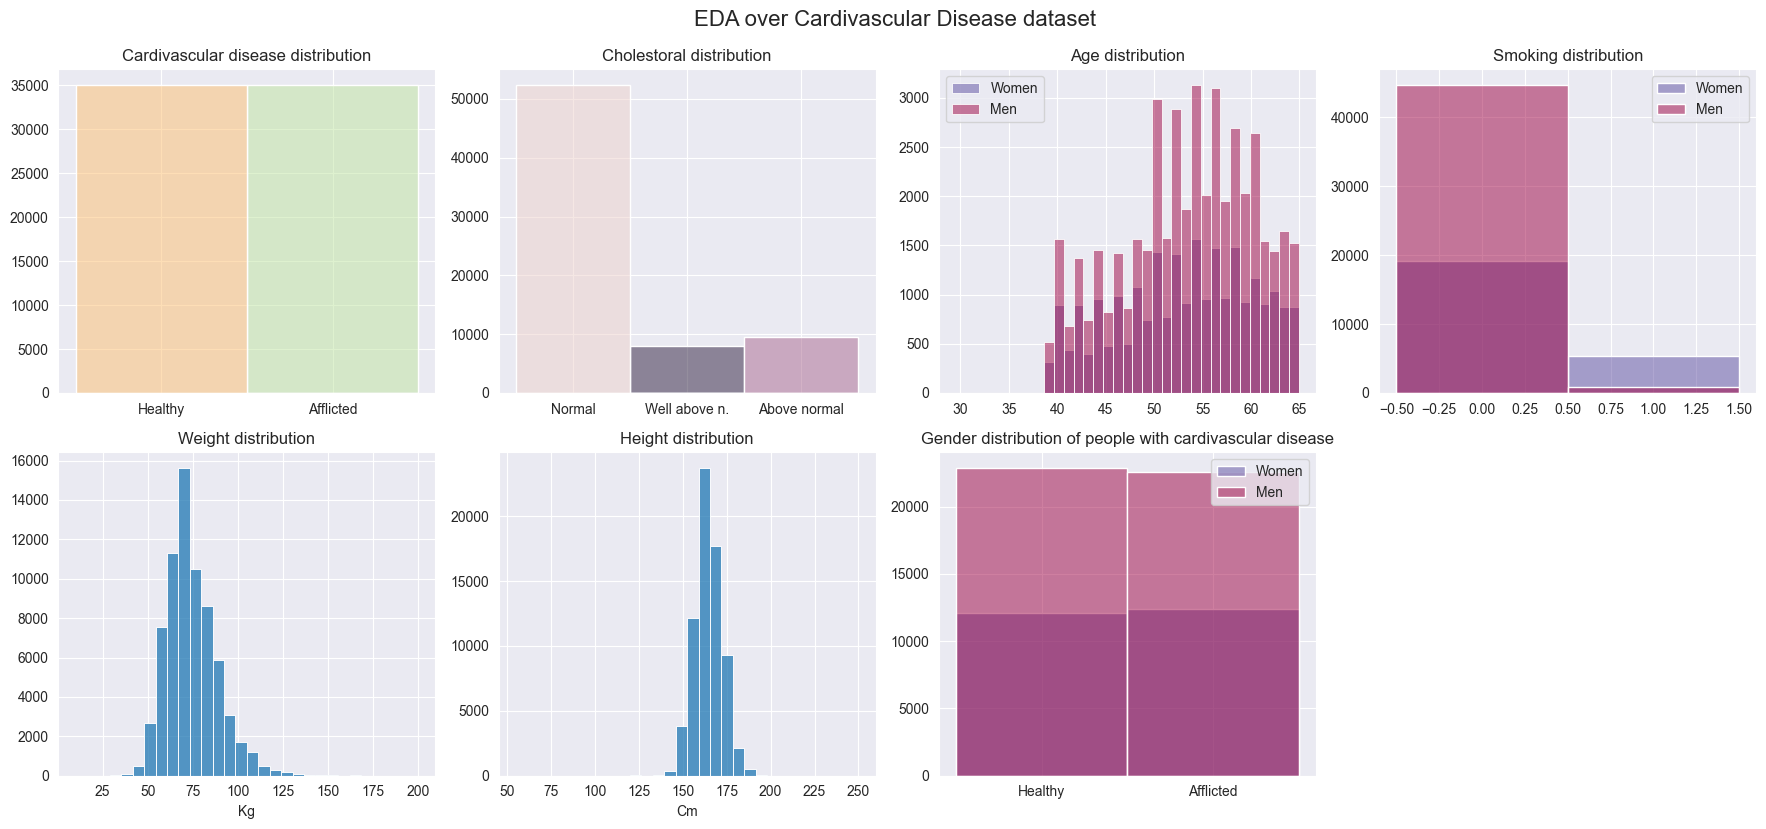

In [3]:
ax, fig = plt.subplots(2, 4, figsize=(18, 8))
# a)
sns.histplot(x=df['cardio'].astype(str), discrete=True, ax=fig[0, 0], hue=df['cardio'], legend=False, palette='Spectral').set(xlabel=None, ylabel=None)
fig[0, 0].set_title('Cardivascular disease distribution')
fig[0, 0].set_xticklabels(['Healthy', 'Afflicted'])
# b)
sns.histplot(x=df['cholesterol'].astype(str), discrete=True, ax=fig[0, 1], hue=df['cholesterol'], legend=False).set(xlabel=None, ylabel=None)
fig[0, 1].set_title('Cholestoral distribution')
fig[0, 1].set_xticklabels(['Normal', 'Well above n.', 'Above normal'])
# c)
sns.histplot(x=df['age'], ax=fig[0, 2], bins=35, hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
fig[0, 2].set_title('Age distribution')
fig[0, 2].legend(['Women', 'Men'])
# d)
sns.histplot(x=df['smoke'], discrete=True, ax=fig[0, 3], hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
plt.xticks(axes=fig[0, 3], ticks=[0, 1], labels=['Non-smoker', 'Smoker'])
# fig[0, 3].set_xticklabels(['Non-smoker', 'Smoker'])
fig[0, 3].set_title('Smoking distribution')
fig[0, 3].legend(['Women', 'Men'])
# e)
sns.histplot(x=df['weight'], bins=30, ax=fig[1, 0]).set(xlabel="Kg", ylabel=None)
fig[1, 0].set_title('Weight distribution')
# f)
sns.histplot(x=df['height'], bins=30, ax=fig[1, 1]).set(xlabel="Cm", ylabel=None)
fig[1, 1].set_title('Height distribution')
# g)
sns.histplot(x=df['cardio'].astype(str), discrete=True, ax=fig[1, 2], hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
fig[1, 2].set_title('Gender distribution of people with cardivascular disease')
fig[1, 2].set_xticklabels(['Healthy', 'Afflicted'])
fig[1, 2].legend(['Women', 'Men'])

ax.tight_layout()
ax.delaxes(fig[1, 3])
ax.suptitle('EDA over Cardivascular Disease dataset', fontsize=16, y=1.03)


In [4]:
print(f"{(df['ap_hi'] < 0).value_counts()}\n\n{(df['ap_lo'] < 0).value_counts()}")

ap_hi
False    69993
True         7
Name: count, dtype: int64

ap_lo
False    69999
True         1
Name: count, dtype: int64


<Axes: >

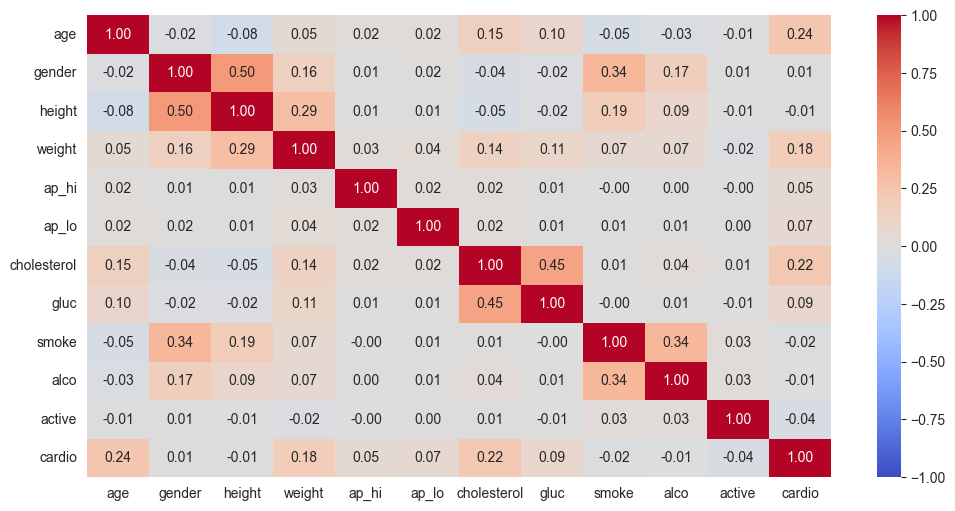

In [5]:
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax,
            #mask=mask
            )

In [6]:
df['BMI'] = df['weight'] / (df['height'] / 100)**2

In [7]:
bmi_categories = pd.cut(df['BMI'], [-np.inf, 18.5, 24.9, 29.9, 34.9, np.inf], labels=['Normal weight', 'Overweight', 'Obese (class I)', 'Obese (class II)', 'Obese (class III)'])
bmi_categories = pd.get_dummies(bmi_categories, drop_first=False, dtype=int)
df = pd.concat([df, bmi_categories], axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III)
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,1,0,0,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,0,0,0,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,1,0,0,0
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,0,1,0,0
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,1,0,0,0


<Axes: >

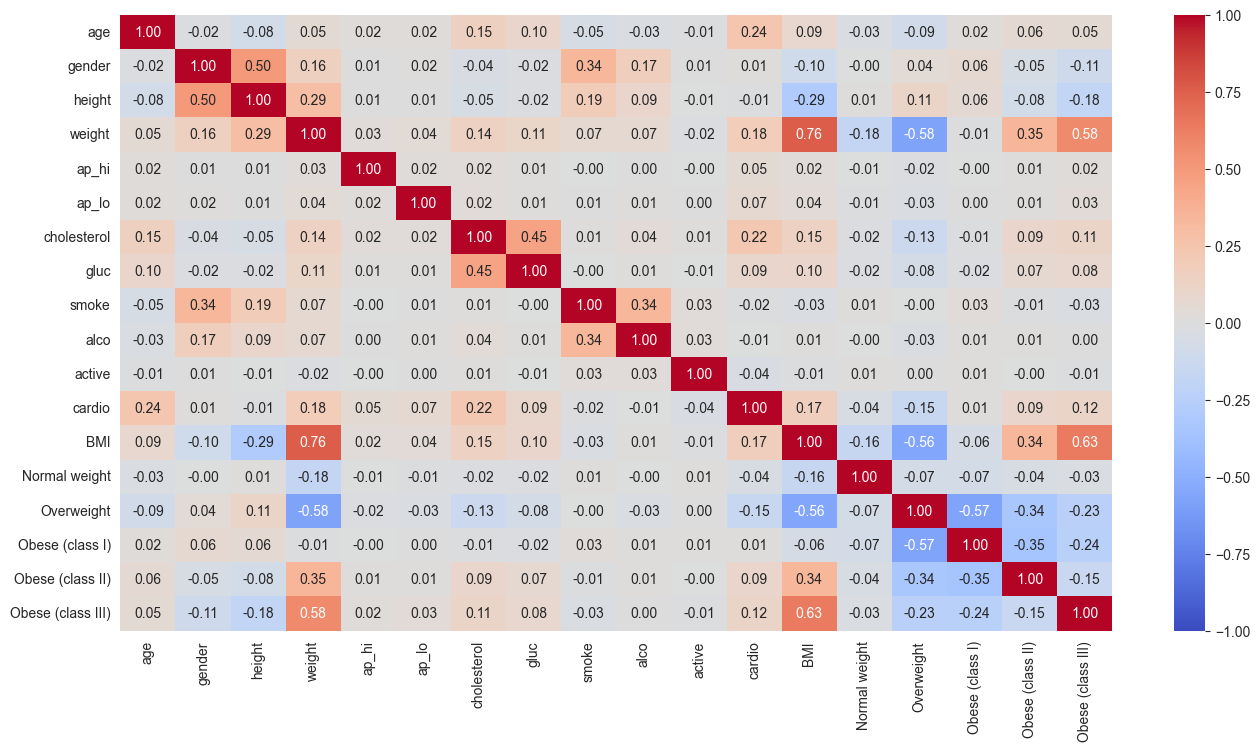

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [9]:
df['BP Healthy'] = (df['ap_hi'] < 120) & (df['ap_lo'] < 80).astype(int)
df['BP Elevated'] = (df['ap_hi'] >= 120) & (df['ap_hi'] < 130) & (df['ap_lo'] < 80).astype(int)
df['BP Hypertension (stage 1)'] = ((df['ap_hi'] >= 130) & (df['ap_hi'] < 140)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] < 90)).astype(int)
df['BP Hypertension (stage 2)'] = (df['ap_hi'] >= 140) | (90 <= df['ap_lo']).astype(int)
df['BP Hypertensive Crisis'] = (df['ap_hi'] >= 180) | (120 < df['ap_lo']).astype(int)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III),BP Healthy,BP Elevated,BP Hypertension (stage 1),BP Hypertension (stage 2),BP Hypertensive Crisis
0,50.357290,2,168,62.0,110,80,1,1,0,0,...,0,1,0,0,0,False,False,True,False,False
1,55.381246,1,156,85.0,140,90,3,1,0,0,...,0,0,0,0,1,False,False,False,True,False
2,51.627652,1,165,64.0,130,70,3,1,0,0,...,0,1,0,0,0,False,False,True,False,False
3,48.249144,2,169,82.0,150,100,1,1,0,0,...,0,0,1,0,0,False,False,False,True,False
4,47.841205,1,156,56.0,100,60,1,1,0,0,...,0,1,0,0,0,True,False,False,False,False


<Axes: >

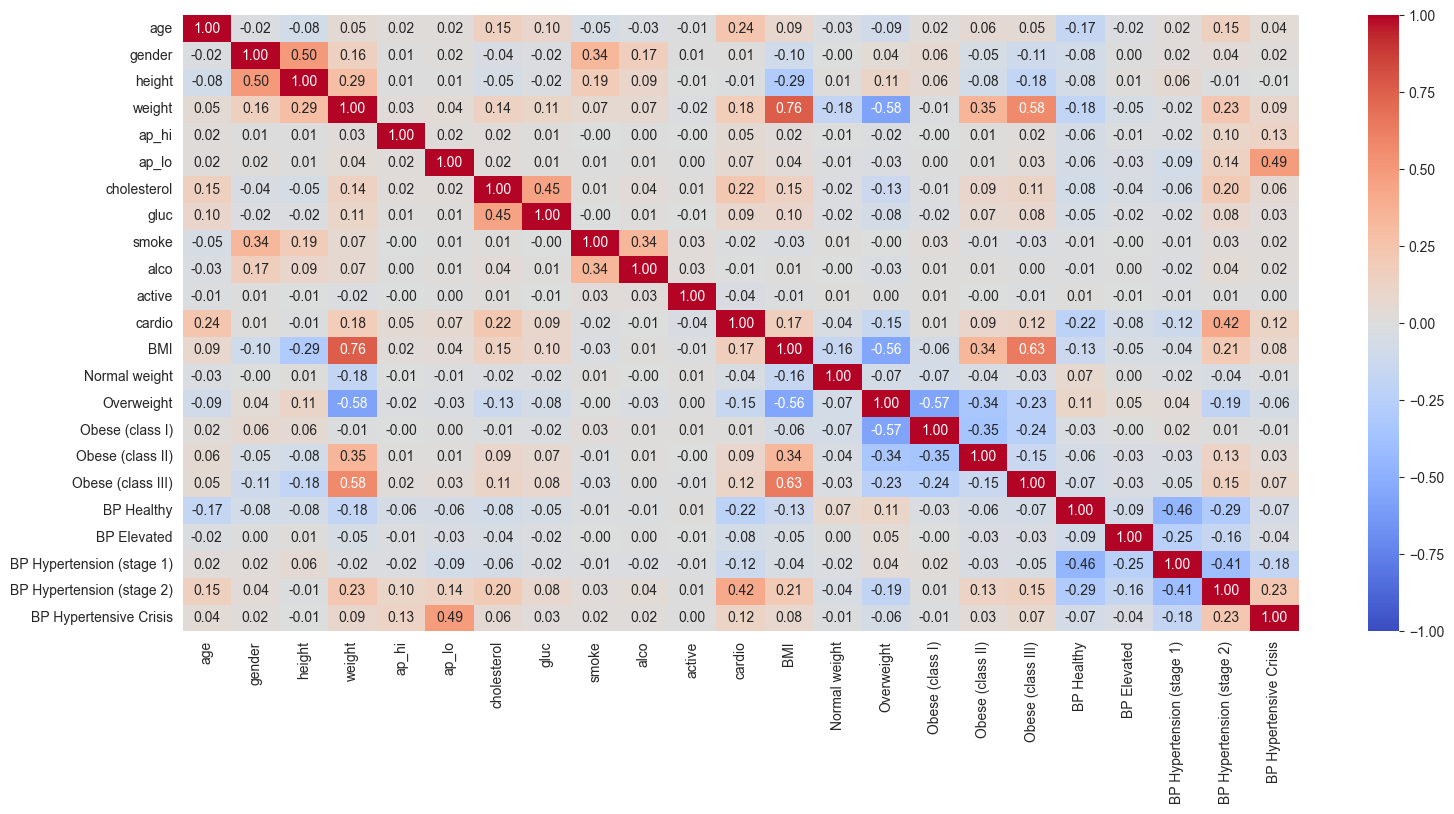

In [10]:
ax, fig = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [11]:
df1 = df.drop(['ap_hi', 'ap_lo', 'height', 'weight','BMI'], axis=1)
df2 = df.drop(['Normal weight', 'Overweight', 'Obese (class I)', 'Obese (class II)', 'Obese (class III)', 'BP Healthy', 'BP Elevated', 'BP Hypertension (stage 1)', 'BP Hypertension (stage 2)', 'BP Hypertensive Crisis', 'height', 'weight'], axis=1)
display(df1.head(), df2.head())

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III),BP Healthy,BP Elevated,BP Hypertension (stage 1),BP Hypertension (stage 2),BP Hypertensive Crisis
0,50.357290,2,1,1,0,0,1,0,0,1,0,0,0,False,False,True,False,False
1,55.381246,1,3,1,0,0,1,1,0,0,0,0,1,False,False,False,True,False
2,51.627652,1,3,1,0,0,0,1,0,1,0,0,0,False,False,True,False,False
3,48.249144,2,1,1,0,0,1,1,0,0,1,0,0,False,False,False,True,False
4,47.841205,1,1,1,0,0,0,0,0,1,0,0,0,True,False,False,False,False


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.357290,2,110,80,1,1,0,0,1,0,21.967120
1,55.381246,1,140,90,3,1,0,0,1,1,34.927679
2,51.627652,1,130,70,3,1,0,0,0,1,23.507805
3,48.249144,2,150,100,1,1,0,0,1,1,28.710479
4,47.841205,1,100,60,1,1,0,0,0,0,23.011177


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

X, y = df1.drop('cardio', axis=1), df1['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

scaler = MinMaxScaler()

pipe_log = make_pipeline(scaler, LogisticRegression(max_iter=1000))
pipe_knn = make_pipeline(scaler, KNeighborsClassifier())
pipe_rf = make_pipeline(scaler, RandomForestClassifier())

param_grid_log = {'logisticregression__C': [0.1, 1, 10, 100]}
param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1, 10)}
param_grid_rf = {'randomforestclassifier__n_estimators': [50, 100, 200]}

grid_log = GridSearchCV(pipe_log, param_grid_log, cv=5)
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5)

grid_log.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-nqPwo2ln\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-nqPwo2ln\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]})

In [13]:
y_pred_log = grid_log.predict(X_test)
y_pred_knn = grid_knn.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

print('Logistic Regression\n', classification_report(y_test, y_pred_log))
print('KNN\n', classification_report(y_test, y_pred_knn))
print('Random Forest\n', classification_report(y_test, y_pred_rf))

Logistic Regression
               precision    recall  f1-score   support

           0       0.70      0.79      0.74     17484
           1       0.76      0.65      0.70     17516

    accuracy                           0.72     35000
   macro avg       0.73      0.72      0.72     35000
weighted avg       0.73      0.72      0.72     35000

KNN
               precision    recall  f1-score   support

           0       0.70      0.71      0.71     17484
           1       0.71      0.69      0.70     17516

    accuracy                           0.70     35000
   macro avg       0.70      0.70      0.70     35000
weighted avg       0.70      0.70      0.70     35000

Random Forest
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     17484
           1       0.64      0.64      0.64     17516

    accuracy                           0.64     35000
   macro avg       0.64      0.64      0.64     35000
weighted avg       0.64      0.64